In [19]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [27]:
df = pd.read_csv('data/data2_0.75_6.csv',header=None)

df

,0,1,2
0,0.156327,1.185676e-02,0
1,0.211109,3.220876e-02,0
2,0.263386,6.086580e-02,0
3,0.312221,9.754146e-02,0
4,0.356707,1.418555e-01,0
...,...,...,...
493,-13.181762,4.118132e+00,1
494,-13.510777,3.122201e+00,1
495,-13.764337,2.100020e+00,1
496,-13.940352,1.057319e+00,1


In [28]:
df.rename(columns={0:'Feature1',1:'Feature2',2:'Target'},inplace=True)
df

,Feature1,Feature2,Target
0,0.156327,1.185676e-02,0
1,0.211109,3.220876e-02,0
2,0.263386,6.086580e-02,0
3,0.312221,9.754146e-02,0
4,0.356707,1.418555e-01,0
...,...,...,...
493,-13.181762,4.118132e+00,1
494,-13.510777,3.122201e+00,1
495,-13.764337,2.100020e+00,1
496,-13.940352,1.057319e+00,1


In [29]:
import warnings
warnings.filterwarnings('ignore')
import glob 
from sklearn.model_selection import train_test_split
import seaborn as sns
# from tensorflow.keras.layers import Dense,Activation,Flatten
# from tensorflow.keras.model import Sequential
# from tensorflow.keras.optimizers import Adam

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  498 non-null    float64
 1   Feature2  498 non-null    float64
 2   Target    498 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [31]:
df.describe()

,Feature1,Feature2,Target
count,498.000000,4.980000e+02,498.000000
mean,0.031140,2.811015e-11,0.502008
std,5.797450,5.765504e+00,0.500499
min,-13.940352,-1.308054e+01,0.000000
25%,-3.640488,-3.583832e+00,0.000000
50%,0.053911,3.684670e-15,1.000000
75%,3.705736,3.470225e+00,1.000000
max,15.607963,1.288086e+01,1.000000


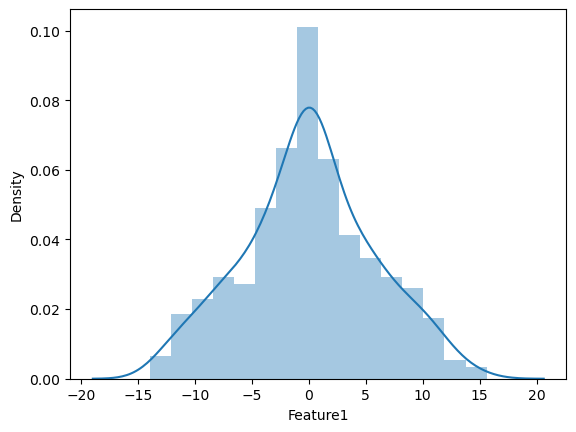

In [32]:
sns.distplot(df['Feature1'])
plt.show()

<AxesSubplot:xlabel='Target', ylabel='count'>

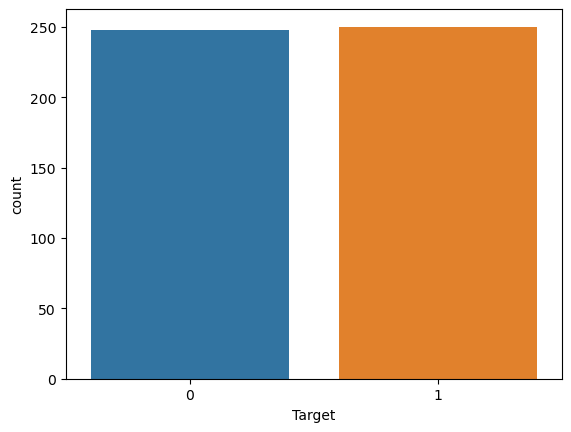

In [33]:
sns.countplot(df['Target'])

<AxesSubplot:xlabel='Feature1', ylabel='Feature2'>

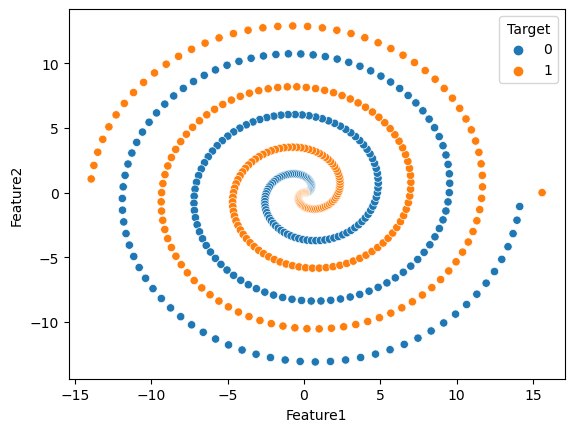

In [35]:
sns.scatterplot(x='Feature1',y='Feature2',data=df, hue='Target')

In [36]:
df['Feature1'].nunique(),df['Feature2'].nunique()

(498, 498)

In [37]:
df['Target'].value_counts()

1    250
0    248
Name: Target, dtype: int64

In [38]:
df = df.sample(frac=1)
data = df.values
x,y = data[:,:-1],data[:,-1]

In [39]:
len(x)

498

In [40]:
len(y)

498

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(373, 2) (125, 2) (373,) (125,)


In [42]:
# Choosing activation as Relu in hidden layer and sigmoid in the last layer for classification
# Choosing optimizer as Adam as it converges better than SGD
# The learning rate is set to 0.001, it is small to impove the convergence
# loss is set to binary_crossentropy as it is binary classification

model = keras.Sequential()
model.add(keras.layers.Dense(8,input_dim=(x_train.shape[1]),activation='relu'))
model.add(keras.layers.Dense(4,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None


2022-08-30 12:37:15.587891: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-30 12:37:15.629940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-08-30 12:37:15.629962: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-08-30 12:37:15.632500: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [43]:
history = model.fit(x_train,y_train,epochs=100,batch_size=8,validation_data=(x_test,y_test))

Epoch 1/100
47/47 [==============================] - 1s 5ms/step - loss: 1.5140 - accuracy: 0.5121 - val_loss: 1.2357 - val_accuracy: 0.4720
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 1.0632 - accuracy: 0.4960 - val_loss: 0.9191 - val_accuracy: 0.4560
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.8399 - accuracy: 0.4879 - val_loss: 0.7772 - val_accuracy: 0.5120
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.7637 - accuracy: 0.5040 - val_loss: 0.7330 - val_accuracy: 0.5200
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.5040 - val_loss: 0.7141 - val_accuracy: 0.5200
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.7270 - accuracy: 0.5067 - val_loss: 0.7076 - val_accuracy: 0.5200
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.7203 - accuracy: 0.4987 - val_loss: 0.7000 - val_accuracy: 0.5040
Epoch 8/100
4

In [44]:
    print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


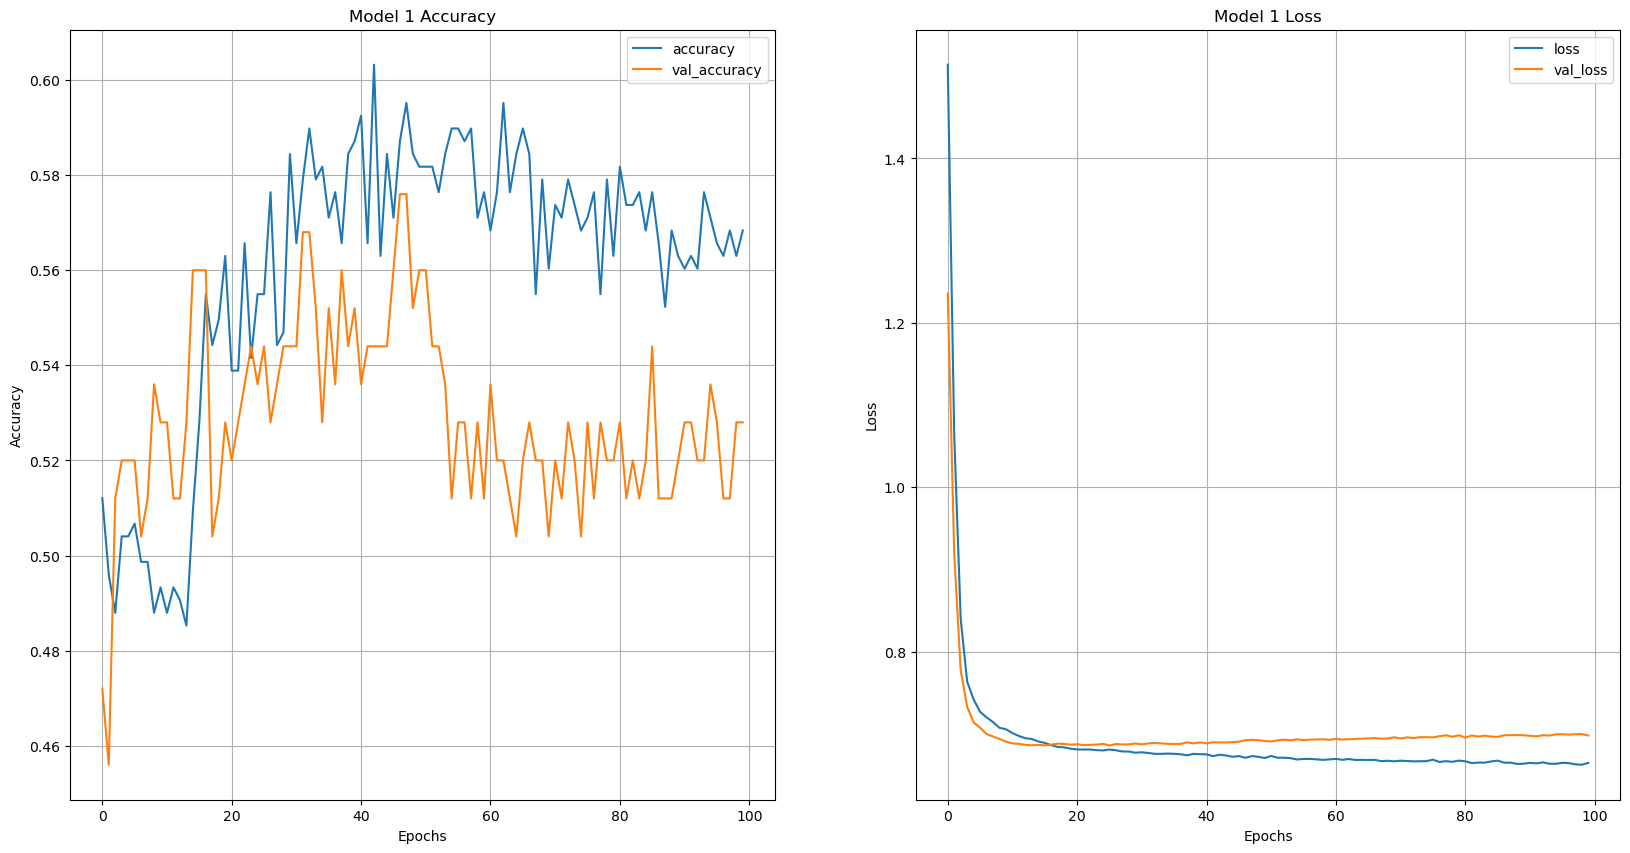

In [46]:
def metric(hist):
    fig,ax=plt.subplots(1,2,figsize=(20,10))
    ax[0].plot(hist.history['accuracy'],label='accuracy')
    ax[0].plot(hist.history['val_accuracy'],label='val_accuracy')
    ax[0].legend()
    ax[0].title.set_text('Model 1 Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    ax[1].plot(hist.history['loss'],label='loss')
    ax[1].plot(hist.history['val_loss'],label='val_loss')
    ax[1].legend()
    ax[1].title.set_text('Model 1 Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    plt.show()

metric(history)


In [68]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(12,input_dim=(x_train.shape[1]),activation='relu'))
model1.add(keras.layers.Dense(4,activation='relu'))
# model1.add(keras.layers.Dense(6,activation='relu'))
model1.add(keras.layers.Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

print(model1.summary())


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 12)                36        
                                                                 
 dense_28 (Dense)            (None, 4)                 52        
                                                                 
 dense_29 (Dense)            (None, 1)                 5         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
history1 = model1.fit(x_train,y_train,epochs=100,batch_size=8,validation_data=(x_test,y_test))

Epoch 1/100
47/47 [==============================] - 0s 4ms/step - loss: 1.2411 - accuracy: 0.5013 - val_loss: 0.9350 - val_accuracy: 0.4720
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.8806 - accuracy: 0.5201 - val_loss: 0.7352 - val_accuracy: 0.5760
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.7309 - accuracy: 0.4799 - val_loss: 0.6936 - val_accuracy: 0.5360
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4933 - val_loss: 0.6848 - val_accuracy: 0.5440
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4960 - val_loss: 0.6831 - val_accuracy: 0.5440
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5040 - val_loss: 0.6812 - val_accuracy: 0.5440
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5282 - val_loss: 0.6805 - val_accuracy: 0.5360
Epoch 8/100
4

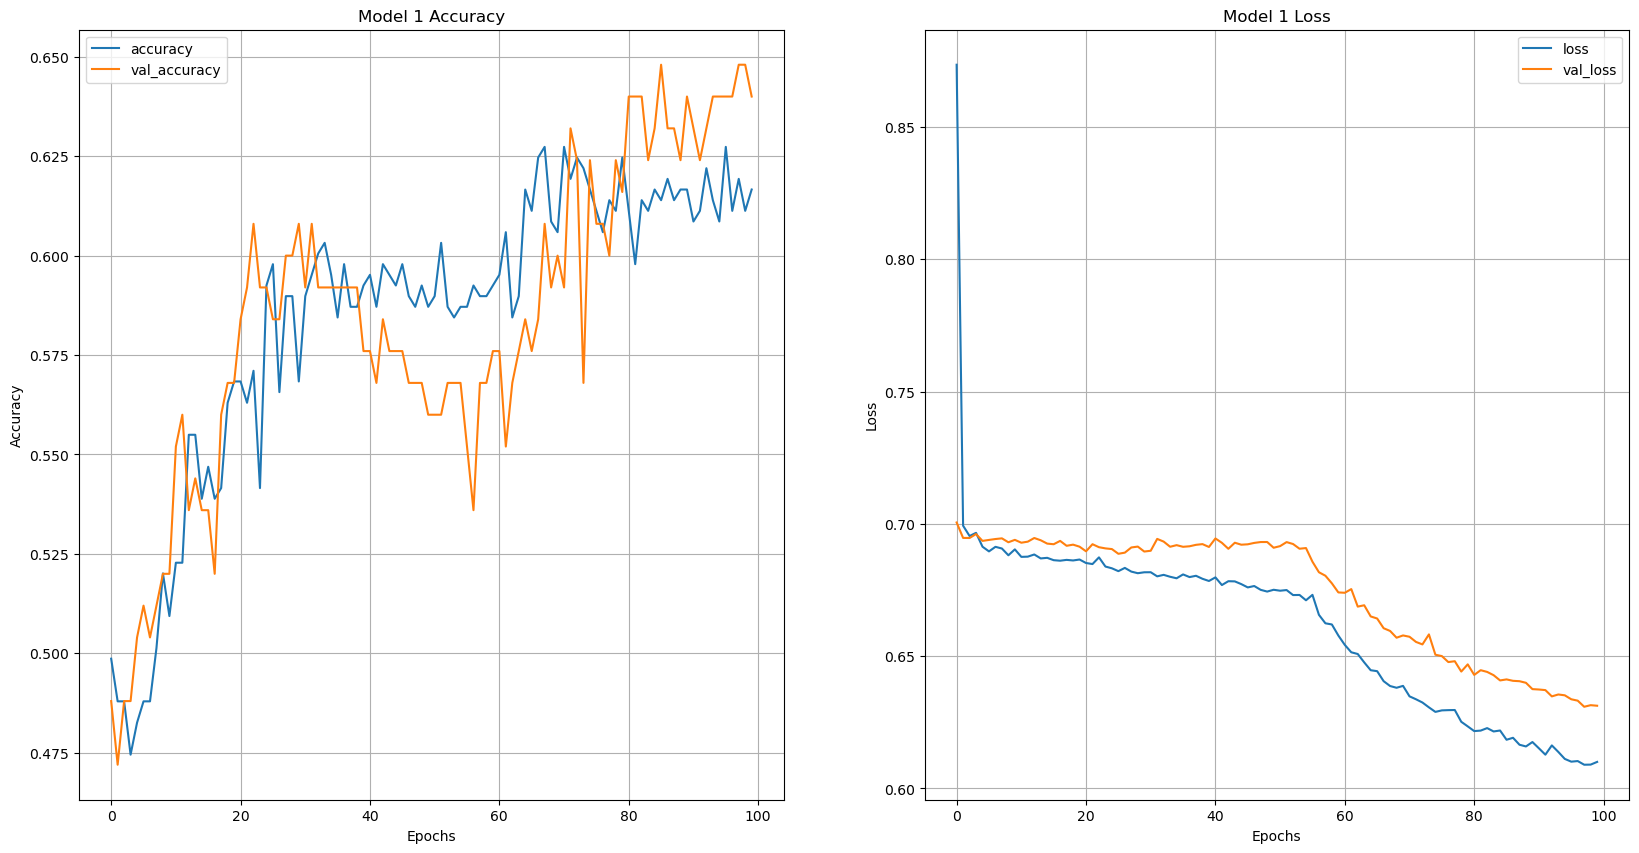

In [66]:
metric(history1)

Compariions:
1. the model 2 has more number of parameters than model 1
2. model 2 tends to overfit as compared to model 1
3. the training loss model 1 is higher than model 2
4. the validation loss model 1 is lower than model 2
5. the training accuracy model 1 is higher than model 2
6. the validation accuracy model 1 is lower than model 2
model 2 is overfitting

<AxesSubplot:xlabel='Feature1', ylabel='Feature2'>

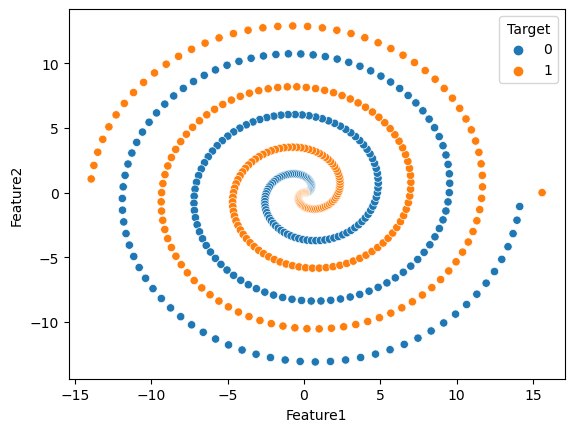

In [82]:
# Feature transformation 

df = pd.read_csv('data/data2_0.75_6.csv',header=None)
df.rename(columns={0:'Feature1',1:'Feature2',2:'Target'},inplace=True)
sns.scatterplot(x='Feature1',y='Feature2',data=df, hue='Target')

In [83]:
# Creating derived feature 
# Since there is a spiral pattern in the data we want to use squared features
# x^2 + y^2 = r^2 (equation of circle)
# Also as the llalbel pattern in the data alternating, we will use the sin transformation to account for that
# for this wave like pattern

df['DerivedFeature1']=np.sin(df['Feature1'])
df['DerivedFeature2']=np.sin(df['Feature2'])
df['DerivedFeature3']=df['Feature1']**2
df['DerivedFeature4']=df['Feature2']**2

df.drop(['Feature1','Feature2'],axis=1,inplace=True)
df = df.sample(frac=1)
data = df.values
x,y = data[:,1:],data[:,0]





In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(373, 4) (125, 4) (373,) (125,)


In [85]:
model = keras.Sequential()
model.add(keras.layers.Dense(4,input_dim=(x_train.shape[1]),activation='tanh'))
model.add(keras.layers.Dense(2,activation='tanh'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

print(model.summary())


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 2)                 10        
                                                                 
 dense_38 (Dense)            (None, 1)                 3         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
history = model.fit(x_train,y_train,epochs=1000,batch_size=16,validation_data=(x_test,y_test))

Epoch 1/1000
24/24 [==============================] - 1s 7ms/step - loss: 0.7810 - accuracy: 0.5040 - val_loss: 0.7920 - val_accuracy: 0.4880
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7615 - accuracy: 0.5094 - val_loss: 0.7722 - val_accuracy: 0.4720
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.5147 - val_loss: 0.7586 - val_accuracy: 0.4720
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.7282 - accuracy: 0.5147 - val_loss: 0.7460 - val_accuracy: 0.4640
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7165 - accuracy: 0.5201 - val_loss: 0.7362 - val_accuracy: 0.4720
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5201 - val_loss: 0.7296 - val_accuracy: 0.4800
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5201 - val_loss: 0.7248 - val_accuracy: 0.4800
Epoch 

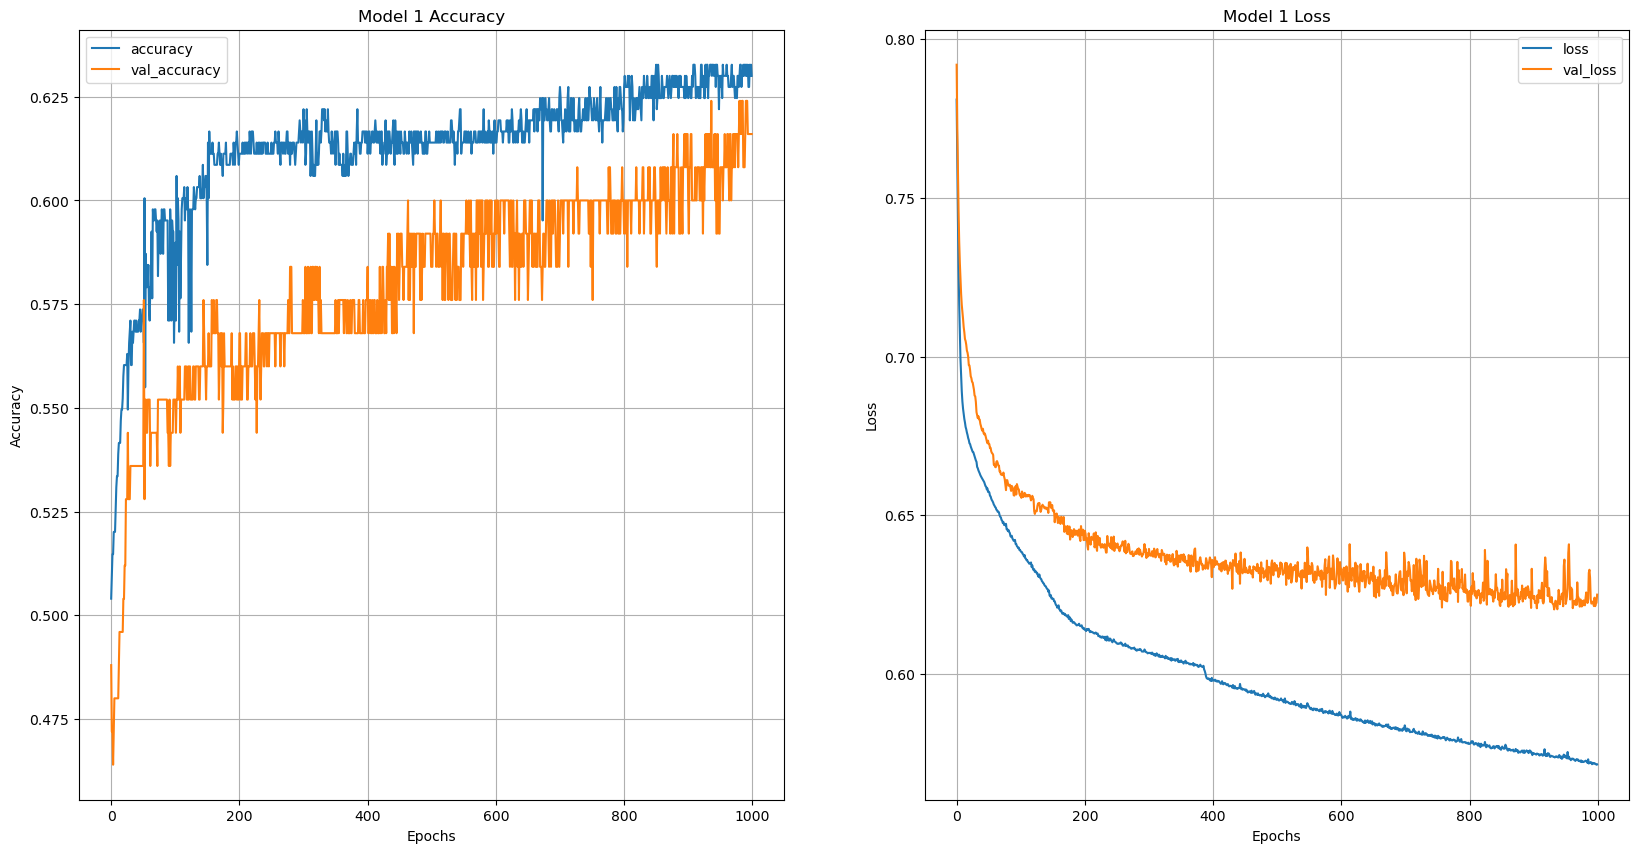

In [87]:
metric(history)

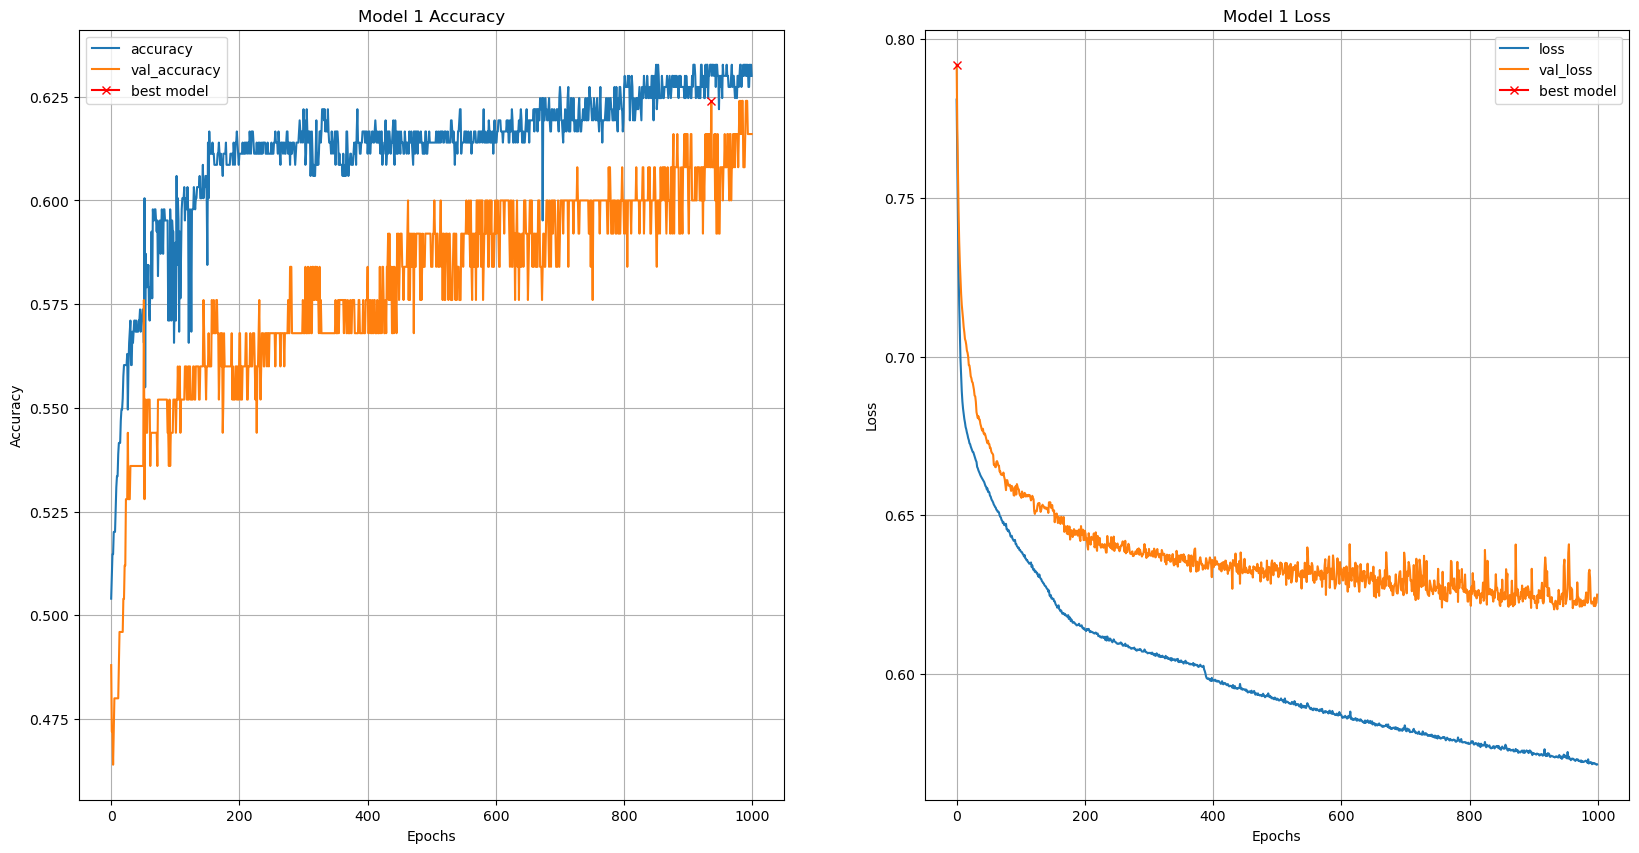

In [94]:
def metric(hist):
    fig,ax=plt.subplots(1,2,figsize=(20,10))
    ax[0].plot(hist.history['accuracy'],label='accuracy')
    ax[0].plot(hist.history['val_accuracy'],label='val_accuracy')
    ax[0].plot(np.argmax(hist.history['val_accuracy']),np.max(hist.history['val_accuracy']),marker='x',color='r', label='best model',)
    ax[0].legend()
    ax[0].title.set_text('Model 1 Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    ax[1].plot(hist.history['loss'],label='loss')
    ax[1].plot(hist.history['val_loss'],label='val_loss')
    ax[1].plot(np.argmax(hist.history['val_loss']),np.max(hist.history['val_loss']),marker='x',color='r',label='best model')    
    ax[1].legend()
    ax[1].title.set_text('Model 1 Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    plt.show()

metric(history)


In [95]:
print('Minimum training loss:',np.min(history.history['loss']))
print('Minimum validation loss:',np.min(history.history['val_loss']))

print('Maximum training accuracy:',np.max(history.history['accuracy']))
print('Maximum validation accuracy:',np.max(history.history['val_accuracy']))

Minimum training loss: 0.5714371204376221
Minimum validation loss: 0.6203687787055969
Maximum training accuracy: 0.6327077746391296
Maximum validation accuracy: 0.6240000128746033


In [96]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
print(cm)


4/4 [==============================] - 0s 2ms/step
[[43 22]
 [26 34]]
